In [45]:
#必要なライブラリのインポート
import datetime
#import japanize_matplotlib
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Hiragino Sans"  # Mac の日本語フォント

import pandas as pd
import numpy as np
import yfinance as yf

%matplotlib inline

stock_code = pd.read_csv("../3.dataset/stock_codes.csv")
stock_code

,コード,銘柄名
0,1301,極洋
1,1305,ダイワ上場投信－トピックス
2,1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信
3,1308,上場インデックスファンドＴＯＰＩＸ
4,1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信
...,...,...
4241,9993,ヤマザワ
4242,9994,やまや
4243,9995,グローセル
4244,9996,サトー商会


In [56]:
#株価コード検索
search = 'ソニー'
stock_code[stock_code['銘柄名'].str.contains(search)]

,コード,銘柄名
2720,6758,ソニーグループ


In [47]:
# 1.株価取得
start = '2010-01-01'
end = '2022-12-31'
ticker = '6758.T'
#df = yf.download(tickers=ticker, start=start, end=end, auto_adjust=False)

df = yf.download(ticker,start, end,auto_adjust=False)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,6758.T,6758.T,6758.T,6758.T,6758.T,6758.T
Date,,,,,,
2010-01-04,480.932983,546.200012,548.799988,538.799988,540.000000,20022500
2010-01-05,478.819733,543.799988,556.400024,540.799988,556.200012,24471500
2010-01-06,483.046204,548.599976,551.400024,539.799988,543.799988,21354500
2010-01-07,483.046204,548.599976,552.799988,544.599976,549.799988,14498000
2010-01-08,494.668915,561.799988,561.799988,553.799988,556.000000,34905500


In [48]:
p0 = df[['Adj Close']].shift(1)
p1 = df[["Adj Close"]]


df['simple_return'] = ((p1/p0)-1)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return
Ticker,6758.T,6758.T,6758.T,6758.T,6758.T,6758.T,
Date,,,,,,,
2010-01-04,480.932983,546.200012,548.799988,538.799988,540.000000,20022500,NaN
2010-01-05,478.819733,543.799988,556.400024,540.799988,556.200012,24471500,-0.004394
2010-01-06,483.046204,548.599976,551.400024,539.799988,543.799988,21354500,0.008827
2010-01-07,483.046204,548.599976,552.799988,544.599976,549.799988,14498000,0.000000
2010-01-08,494.668915,561.799988,561.799988,553.799988,556.000000,34905500,0.024061


In [49]:
#3
#日当たりの平均単純利益率(5日間の平均)
day_avg_return = df['simple_return'].mean()
day_avg_return

np.float64(0.0006773463221015541)

In [50]:
#対数利益率
#6
p0 = df[['Adj Close']].shift(1)
p1 = df[["Adj Close"]]

df['log_return'] = np.log(p1/p0)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_return,log_return
Ticker,6758.T,6758.T,6758.T,6758.T,6758.T,6758.T,,
Date,,,,,,,,
2010-01-04,480.932983,546.200012,548.799988,538.799988,540.000000,20022500,NaN,NaN
2010-01-05,478.819733,543.799988,556.400024,540.799988,556.200012,24471500,-0.004394,-0.004404
2010-01-06,483.046204,548.599976,551.400024,539.799988,543.799988,21354500,0.008827,0.008788
2010-01-07,483.046204,548.599976,552.799988,544.599976,549.799988,14498000,0.000000,0.000000
2010-01-08,494.668915,561.799988,561.799988,553.799988,556.000000,34905500,0.024061,0.023776


In [51]:
#7対数利益率の日ごとの平均
day_log_return = df['log_return'].mean()
day_log_return



np.float64(0.000440597218406937)

In [52]:
#年間の単純利益率の計算(営業日は246日)
day_log_return * 246

np.float64(0.1083869157281065)

In [53]:
#コードの検索
search = 'くら'
stock_code[stock_code['銘柄名'].str.contains(search)]

,コード,銘柄名
678,2695,くら寿司
1277,3778,さくらインターネット
1868,4761,さくらケーシーエス
2920,7097,さくらさくプラス


In [54]:
#9
#ソニー、トヨタ自動車、ヤクルト、くら寿司
start = '2010-01-01'
end = '2022-12-31'
tickers = {'ソニーグループ':'6758.T','トヨタ自動車':'7203.T','ヤクルト':'2267.T','くら寿司':'2695.T'}

df = pd.DataFrame()
for ticker, number in tickers.items():
    df[ticker] = yf.download(number,start,end,auto_adjust=False)['Adj Close']
df.head()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2010-01-04,480.932983,504.419891,1223.524902,550.356323
2010-01-05,478.819733,493.397797,1208.456665,559.077942
2010-01-06,483.046204,505.068268,1210.609375,573.837646
2010-01-07,483.046204,499.233063,1162.391602,579.428528
2010-01-08,494.668915,513.496765,1157.225586,564.445129


<Axes: xlabel='Date'>

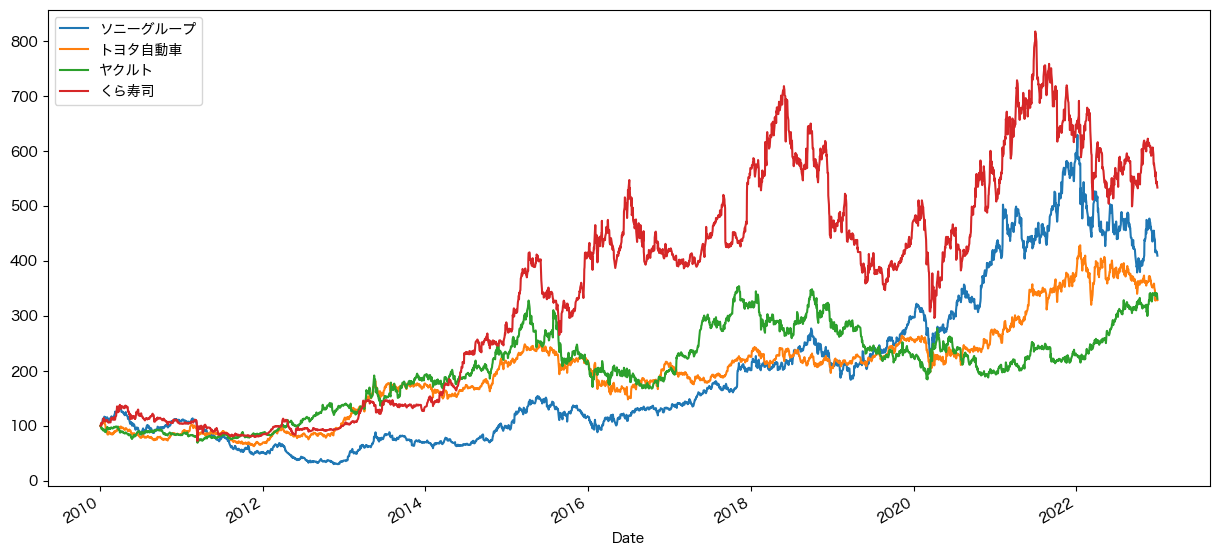

In [55]:
# 11.良い例
#正規化(今回は初期値を100で統一するために、*100をする)
# それぞれの値を初日*100で割る

(df / df.iloc[0]*100).plot(figsize=(15,7))

In [58]:
#12単純利益率
p0 = df.shift(1)
p1 = df
#銘柄別のデータフレームを日別の収益率を算出
df = ((p1/p0)-1)
df.head()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,-0.004394,-0.021851,-0.012315,0.015847
2010-01-06,0.008827,0.023653,0.001781,0.026400
2010-01-07,0.000000,-0.011553,-0.039829,0.009743
2010-01-08,0.024061,0.028571,-0.004444,-0.025859


In [59]:
#13　単純利益率の計算(年)
df.mean()*246

#→1年ん間で12~17%上昇していることがわかる
#この値に*100をすると%表示していることと同じ


ソニーグループ    0.166627
トヨタ自動車     0.123347
ヤクルト       0.133669
くら寿司       0.179121
dtype: float64

In [60]:
#14 np.dot:ベクトル、行列の内積計算
#

w = np.array([0.25,0.25,0.25,0.25])#重み
np.dot(df.mean()*246,w)

np.float64(0.15069106388423603)

In [61]:
#15　保有割合を変更してみる
w = np.array([0.3,0.1,0.2,0.4])
np.dot(df.mean()*246,w)

np.float64(0.1607050822374259)

In [64]:
# 16
# 日経225,sp500,インド(NIFTY 50)
start = '2010-01-01'
end = '2020-12-31'
tickers = {'日経225':'^N225','S&P':'^GSPC','インド':'^NSEI'}

df = pd.DataFrame()
df_list = []

for ticker, number in tickers.items():
    df[ticker] = yf.download(number,start ,end,auto_adjust=False)['Adj Close']
    #インデックスの時差がバラバラなため、日に統一する
    df.index = df.index.date
    df_list.append(df)
    df = pd.DataFrame()

df = pd.concat(df_list,axis=1).sort_index()
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,日経225,S&P,インド
2010-01-04,10654.790039,1132.989990,5232.200195
2010-01-05,10681.830078,1136.520020,5277.899902
2010-01-06,10731.450195,1137.140015,5281.799805
2010-01-07,10681.660156,1141.689941,5263.100098
2010-01-08,10798.320312,1144.979980,5244.750000


<Axes: >

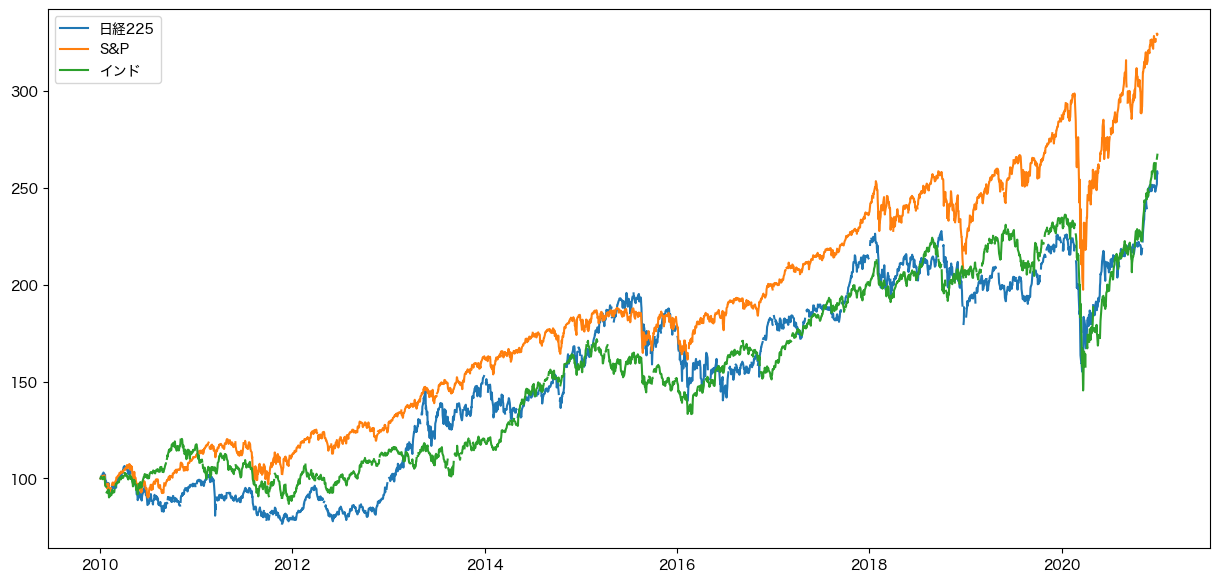

In [65]:
#17 正規化後、グラフ表示
(df / df.iloc[0]*100).plot(figsize=(15,7))


In [66]:
#18
p0 = df.shift(1)
p1 = df

#銘柄別のデータフレームを日別の収益率を算出
df = ((p1/p0)-1)
df.mean()*246

日経225    0.108353
S&P      0.118836
インド      0.088251
dtype: float64

In [68]:
#2-1
#ソニー、トヨタ自動車、ヤクルト、クラ寿司
start = '2020-01-01'
end = '2022-12-31'
tickers = {'ソニーグループ':'6758.T','トヨタ自動車':'7203.T','ヤクルト':'2267.T','くら寿司':'2695.T'}

df = pd.DataFrame()
for ticker,number in tickers.items():
    df[ticker] = yf.download(number,start,end,auto_adjust=False)['Adj Close']
df.head()
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2020-01-06,1429.688843,1270.501099,2705.625732,2624.186768
2020-01-07,1474.968628,1295.692749,2756.155273,2643.411621
2020-01-08,1475.931885,1279.234253,2733.187744,2600.156006
2020-01-09,1503.678101,1288.135254,2783.717285,2657.830078
2020-01-10,1511.192505,1286.623901,2769.936035,2657.830078


In [70]:
#2-2
#対数利益率
p0 = df.shift(1)
p1 = df

df = np.log(p1/p0)
df.head()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,0.031180,0.019634,0.018503,0.007299
2020-01-08,0.000653,-0.012784,-0.008368,-0.016499
2020-01-09,0.018625,0.006934,0.018319,0.021939
2020-01-10,0.004985,-0.001174,-0.004963,0.000000


In [71]:
#2-3
df.mean()*246


ソニーグループ    0.107831
トヨタ自動車     0.089506
ヤクルト       0.135932
くら寿司       0.037711
dtype: float64

In [73]:
#2-4
#バイアス補正あり
print(df.std()*246 ** 0.5)
print(np.std(df,ddof=1) * 246 ** 0.5)

print("-----------------")
#バイアス補正なし
print(df.std(ddof = 0)* 246 ** 0.5)
print(np.std(df) * 246 ** 0.5)

ソニーグループ    0.324481
トヨタ自動車     0.270026
ヤクルト       0.275142
くら寿司       0.363148
dtype: float64
ソニーグループ    0.324481
トヨタ自動車     0.270026
ヤクルト       0.275142
くら寿司       0.363148
dtype: float64
-----------------
ソニーグループ    0.324259
トヨタ自動車     0.269841
ヤクルト       0.274953
くら寿司       0.362899
dtype: float64
ソニーグループ    0.324259
トヨタ自動車     0.269841
ヤクルト       0.274953
くら寿司       0.362899
dtype: float64


In [75]:
#2-4
#ソニーのリスクをスクラッチ絵実装
xi = df['ソニーグループ']
x_mean = df['ソニーグループ'].mean()
n = len(df['ソニーグループ'])

#日当たり利とうc句の算出
sigma = np.sqrt(np.sum(xi - x_mean)**2) / (n-1)

sigma * 246 ** 0.5

np.float64(1.1926827213335978e-18)

In [76]:
#現在のデータフレームの中身を確認
#対数利益率を確認するため
df.head()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,0.031180,0.019634,0.018503,0.007299
2020-01-08,0.000653,-0.012784,-0.008368,-0.016499
2020-01-09,0.018625,0.006934,0.018319,0.021939
2020-01-10,0.004985,-0.001174,-0.004963,0.000000


In [78]:
#2-5
#バイアス補正あり
print(df.var())
print(np.var(df,ddof=1))

print('-------------')

# バイアス補正なし
print(df.var(ddof=0))
print(np.var(df))

ソニーグループ    0.000428
トヨタ自動車     0.000296
ヤクルト       0.000308
くら寿司       0.000536
dtype: float64
ソニーグループ    0.000428
トヨタ自動車     0.000296
ヤクルト       0.000308
くら寿司       0.000536
dtype: float64
-------------
ソニーグループ    0.000427
トヨタ自動車     0.000296
ヤクルト       0.000307
くら寿司       0.000535
dtype: float64
ソニーグループ    0.000427
トヨタ自動車     0.000296
ヤクルト       0.000307
くら寿司       0.000535
dtype: float64


/Users/sekiguchiyuma/Library/CloudStorage/GoogleDrive-yuuuuuma1101@gmail.com/マイドライブ/タスク/IT/pythonファイナンス分析(キノクエスト)/1.株価のデータを可視化してみよう01/1.dataset/kadai/kino_env/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [79]:
#2-6 分散(年)を求める
# バイアス補正あり
print(df.var() * 246)
print(np.var(df,ddof = 1) * 246)
print('---------------')

#バイアス補正なし
print(df.var(ddof=0)*246)
print(np.var(df)*246)

ソニーグループ    0.105288
トヨタ自動車     0.072914
ヤクルト       0.075703
くら寿司       0.131876
dtype: float64
ソニーグループ    0.105288
トヨタ自動車     0.072914
ヤクルト       0.075703
くら寿司       0.131876
dtype: float64
---------------
ソニーグループ    0.105144
トヨタ自動車     0.072814
ヤクルト       0.075599
くら寿司       0.131696
dtype: float64
ソニーグループ    0.105144
トヨタ自動車     0.072814
ヤクルト       0.075599
くら寿司       0.131696
dtype: float64


In [80]:
#ソニーグループの分散をスクラッチで実装
xi = df['ソニーグループ']
x_mean = df['ソニーグループ'].mean()
n = len(df['ソニーグループ'])

#日当たりのリスク計算
sigma = np.sum((xi - x_mean)**2) / (n-1)
print(sigma)
print(sigma * 246)

0.00042741404980459386
0.1051438562519301


In [81]:
#共分散
#ソニーとトヨタの共分散(日)を算出

x = df['ソニーグループ'] - df['ソニーグループ'].mean()
y = df['トヨタ自動車'] - df['トヨタ自動車'].mean()
n = len(df)
np.sum(x*y) / (n-1)

np.float64(0.00018571544558138543)

In [82]:
#2-8
#共分散行列を算出(バイアス補正があるので、若干上記と合わない)
df.cov()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
ソニーグループ,0.000428,0.000186,0.000057,0.000136
トヨタ自動車,0.000186,0.000296,0.000066,0.000137
ヤクルト,0.000057,0.000066,0.000308,0.000046
くら寿司,0.000136,0.000137,0.000046,0.000536


In [83]:
#2-9
#相関関係を確認することで各銘柄同士の関係性がわかる
df.corr()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
ソニーグループ,1.000000,0.522135,0.157280,0.283018
トヨタ自動車,0.522135,1.000000,0.218731,0.344695
ヤクルト,0.157280,0.218731,1.000000,0.112877
くら寿司,0.283018,0.344695,0.112877,1.000000


In [90]:
pip install seaborn

zsh:1: command not found: pip


<Axes: >

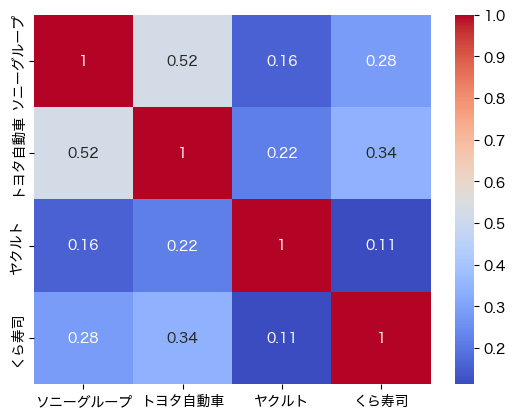

In [91]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [92]:
#現在のデータフレームを確認(対数利益率)
df.head()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,0.031180,0.019634,0.018503,0.007299
2020-01-08,0.000653,-0.012784,-0.008368,-0.016499
2020-01-09,0.018625,0.006934,0.018319,0.021939
2020-01-10,0.004985,-0.001174,-0.004963,0.000000


In [95]:
#10
#保有割合
weight = np.array([0.25,0.25,0.25,0.25])

#ポートフォリオ
np.dot(weight.T, np.dot(df.cov() * 246, weight))

np.float64(0.04342003522583285)

In [97]:
#10 
# ポートフォリオのリスク(標準偏差)
np.dot(weight.T,np.dot(df.cov() * 246, weight)) ** 0.05

np.float64(0.8548393562181819)

In [101]:
#3-1
# ソニー、ヤクルト
start = '2010-01-01'
end = '2022-12-31'
tickers = {'ソニーグループ':'6758.T', 'ヤクルト':'2267.T'}

df = pd.DataFrame()
for ticker, number in tickers.items():
    df[ticker] = yf.download(number, start, end, auto_adjust=False)['Adj Close']
df.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ソニーグループ,ヤクルト
Date,,
2010-01-04,480.932983,1223.524902
2010-01-05,478.819733,1208.456665
2010-01-06,483.046204,1210.609375
2010-01-07,483.046204,1162.391602
2010-01-08,494.668915,1157.225586


In [102]:
#3-2
df_log = np.log(df / df.shift(1))
df_log.head()

,ソニーグループ,ヤクルト
Date,,
2010-01-04,NaN,NaN
2010-01-05,-0.004404,-0.012392
2010-01-06,0.008788,0.001780
2010-01-07,0.000000,-0.040644
2010-01-08,0.023776,-0.004454


In [103]:
#3-3
#合計が1にならない(悪い例)
df_num = len(tickers)
arr = np.random.random(2)
arr

array([0.03793939, 0.46310161])

In [124]:
#3-3
df_num = len(tickers)
weights = np.random.random(df_num)
weights /= np.sum(weights)
weights

array([0.77356245, 0.22643755])

In [125]:
#3-3 ポートフォリオの利益率
(np.sum(weights * df_log.mean())) * 246

np.float64(0.104686719001719)

In [126]:
#3-3 ポートフォリオの分散
np.dot(weights.T, np.dot(df_log.cov() * 246, weights))

np.float64(0.08376384726995308)

In [127]:
# 3-3 ポートフォリオのボラティリティ(標準偏差)
np.sqrt(np.dot(weights.T, np.dot(df_log.cov() * 246, weights)))

np.float64(0.28941984601950344)

In [128]:
#3-4 1000通りの保有割合を試してみて、効率的な保有割合を探索する
pfolia_returns = []
pfolio_std = []

for x in range(1000):
    weights = np.random.random(df_num)
    weights /= np.sum(weights)
    pfolia_returns.append((np.sum(weights * df_log.mean())) * 246)
    pfolio_std.append(np.sqrt(np.dot(weights.T,np.dot(df_log.cov() * 246, weights))))

pfolia_returns = np.array(pfolia_returns)
pfolio_std = np.array(pfolio_std)
portfolios = pd.DataFrame({'returns':pfolia_returns,'std':pfolio_std})
portfolios


,returns,std
0,0.098276,0.249047
1,0.099950,0.251894
2,0.101429,0.259248
3,0.099180,0.249842
4,0.096574,0.252302
...,...,...
995,0.102169,0.264524
996,0.107203,0.323017
997,0.101332,0.258630
998,0.104599,0.288395


<Axes: xlabel='std', ylabel='returns'>

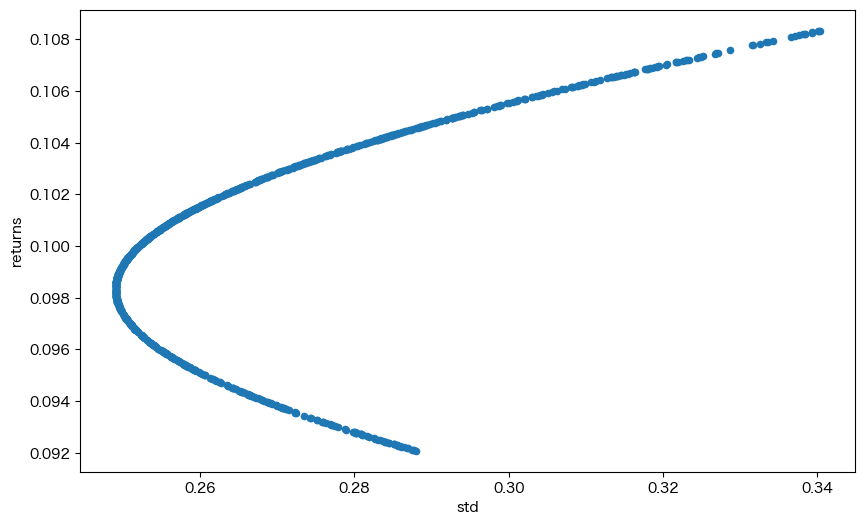

In [144]:
portfolios.plot(x='std', y='returns', kind='scatter', figsize=(10,6))

In [163]:
# 様々な銘柄同士の最適ポートフォリオを確認するような関数

def best_portfolios(tickers, start, end):
    #データ読み込み
    df = pd.DataFrame()
    for ticker, number in tickers.items():
        df[ticker] = yf.download(number,start, end,auto_adjust=False)['Adj Close']

    #対数利益率を算出
    df_log = np.log(df/df.shift(1))
    #ポートフォリオの数を格納
    df_num = len(tickers)
    #ウェイトを入れるかデータドッグなおリストを用意
    weight_list = []
    weight_total = []
    #利益率を入れる箱
    pfolia_returns = []
    #リスクを入れる箱
    pfolio_std = []
    #1000通りの重みを試す
    for x in range(1000):
        weights = np.random.random(df_num)
        weights /= np.sum(weights)
        pfolia_returns.append((np.sum(weights * df_log.mean())) * 246)
        pfolio_std.append(np.sqrt(np.dot(weights.T, np.dot(df_log.cov() * 246, weights))))
        # 保有割合
        for i in range(len(tickers)):
            weight_list.append(weights[i])

        weight_total.append(weight_list)
        weight_list = []

    # 格納したデータを配列に変換
    pfolia_returns = np.array(pfolia_returns)
    pfolia_std = np.array(pfolio_std)
    weight_total = np.array(weight_total)

    #保有割合をデータフレームに変換
    weight_df = pd.DataFrame(weight_total, columns=df.columns)
    #利益率とリスクをデータフレームに変換
    portfolios_plus = pd.DataFrame({'returns':pfolia_returns,'std':pfolio_std})
    # 保有割合と利益率とリスクを結合
    portfolio_plus = pd.merge(weight_df,portfolios_plus, left_index=True,right_index=True)
    portfolio_plus = portfolios_plus.sort_values('returns').reset_index(drop=True)
    #　グラフ化
    portfolios_plus.plot(x='std', y='returns', kind='scatter', figsize=(10,6))
    return portfolios_plus

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,returns,std
0,0.098018,0.205858
1,0.076691,0.214410
2,0.031378,0.226521
3,0.012224,0.249577
4,-0.013166,0.289817
...,...,...
995,0.078453,0.224750
996,0.071868,0.240931
997,0.040821,0.226103
998,0.097459,0.218024


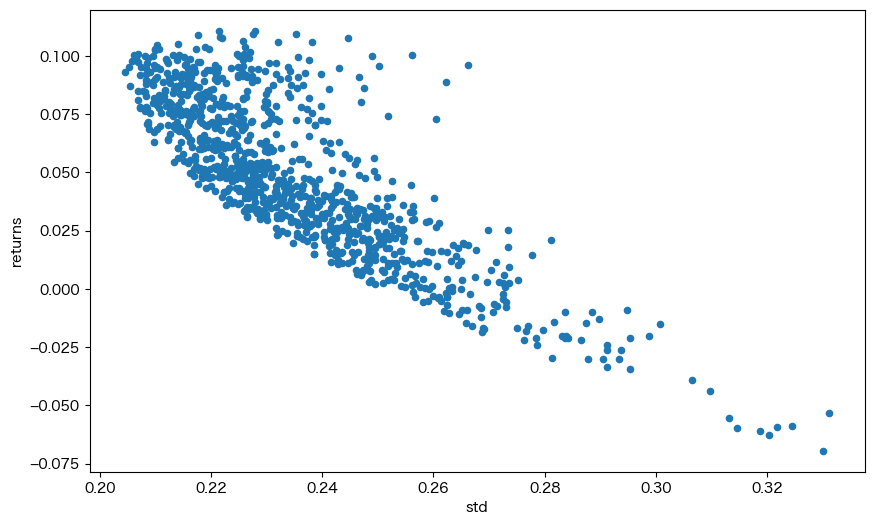

In [167]:
start = '2010-01-01'
end = '2022-12-31'
tickers = {'トヨタ自動車':'7203.T', 'ヤクルト':'2267.T', 'くら寿司':'2695.T', 'ソニーグループ':'6758.T','シャープ':'6753.T'}

# ベストポートフォリオを探求するための関数
df = best_portfolios(tickers, start, end)
df